# Sample Machine Learning Jupyter Notebook

This notebook serves as a very rough guideline on how to use Sklearn and Jupyter Notebook in order to perform a simple Machine Learning task. Much of the information used here was extracted from the textbook *Hands-on machine learning with Scikit-Learn and TensorFlow*

### General Overview of the Project:
1. Import the data and do some simple pre-processing
2. Get a general gist of the data, but not too in depth to prevent overfitting
3. Split the data into a training and test set (do this before any more exploratory analysis) and make sure the training set is representative of the whole dataset to prevent sampling bias in the training phase
4. Continue performing exploratory analysis on the new training set to observe available trends
5. Prepare the features for a machine learning algorithm (perform some max-min and standarization of features)
6. Choose an appropriate model and evaluate it using cross-validation in the training set


## Import the relevant modules and do some data wrangling and initial exploratory analysis

In [1]:
# Import the relevant modules
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
# Import the Cleveland Data Frame and format the columns
df_cd = pd.read_csv('processed_cleveland_data.csv')
df_cd.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df_cd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
# The data has some question marks on some entries. Lets clean them before proceeding
df_cd = df_cd.drop(df_cd[df_cd.values=='?'].index.values)

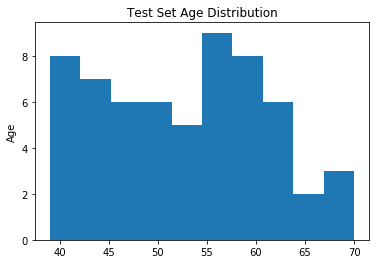

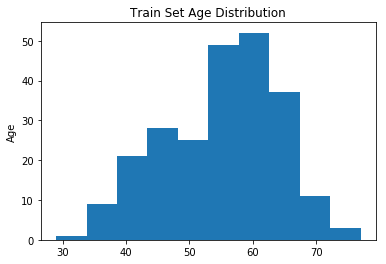

In [4]:
# Create a testing and training set based on the data
train_set, test_set = train_test_split(df_cd, test_size=0.2, random_state=42)
plt.hist(test_set['age'])
plt.title('Test Set Age Distribution')
plt.ylabel('Age')
plt.figure()
plt.hist(train_set['age'])
plt.title('Train Set Age Distribution')
plt.ylabel('Age')
sample_data = train_set.copy()

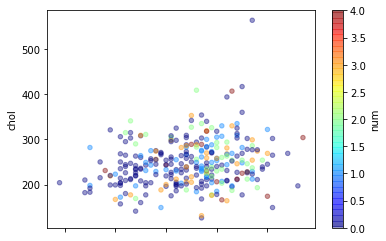

In [5]:
# Perform an illustrative plot
ax = df_cd.plot(kind='scatter',x='age',y='chol',alpha=0.4,c='num', cmap=plt.get_cmap('jet'))

The older one seems to be, the likelier one seems to be prone to have heart disease 

In [6]:
def create_bin_feature(df,feature):
    # Create a binary variable for the heart disease attribute that only depends on values of 0 and 1
    for i in df.index.values:
        bin_feat = int(df[feature].loc[i]>0)
        return bin_feat
        

In [7]:
'''Create a correlation matrix for the values and do some exploration in order to 
observe correlations'''
corr_mat = sample_data.corr()
# print(corr_mat['num_bin'].sort_values(ascending=False))
print(corr_mat['num'].sort_values(ascending=False))

num         1.000000
oldpeak     0.443542
exang       0.423196
cp          0.387739
slope       0.357200
sex         0.253609
age         0.194462
restecg     0.144002
trestbps    0.107155
fbs         0.016345
chol        0.012280
thalach    -0.402890
Name: num, dtype: float64


In [8]:
# Replace the current label num, which is categorical, with a binary feature
#test_set['num'] = create_bin_feature(test_set,'num')
#train_set['num'] = create_bin_feature(train_set,'num')

## Create and Scikit encoder in order to do a feature normalization
In this case a min-max normalization will be performed to prepare the features for the ML algorithm to be used

In [9]:
def perform_min_max(df):
    import sklearn
    min_max_scaler = sklearn.preprocessing.MinMaxScaler() # Define the encoder object
    scaled_features = min_max_scaler.fit_transform(df) # Fit and transform the features using the encoder
    df_scaled = pd.DataFrame(data = scaled_features, index = df.index.values, columns = df.columns)
    return df_scaled

sample_data_scaled = perform_min_max(sample_data)


Compare the correlations between the original and normalized features when predicting the goal attribute


In [10]:
print('Correlations for the original features: \n ', corr_mat['num'].sort_values(ascending=False))
scaled_corr_mat = sample_data_scaled.corr()
print('Correlations for the scaled features: \n ', scaled_corr_mat['num'].sort_values(ascending=False))


Correlations for the original features: 
  num         1.000000
oldpeak     0.443542
exang       0.423196
cp          0.387739
slope       0.357200
sex         0.253609
age         0.194462
restecg     0.144002
trestbps    0.107155
fbs         0.016345
chol        0.012280
thalach    -0.402890
Name: num, dtype: float64
Correlations for the scaled features: 
  num         1.000000
ca          0.511769
thal        0.475884
oldpeak     0.443542
exang       0.423196
cp          0.387739
slope       0.357200
sex         0.253609
age         0.194462
restecg     0.144002
trestbps    0.107155
fbs         0.016345
chol        0.012280
thalach    -0.402890
Name: num, dtype: float64


There should not be a difference when comparing the correlations between the normalized features and the original ones. The normalization is necessary for the ML algorithm, since they tend to weight more those features that have larger values.

Now let's separate the training and test set into the labels and features for the model

In [11]:
def separate_data(df,name):
    labels = df[name]
    features = df.drop(name,axis=1)
    return features, labels

train_features, train_labels = separate_data(train_set,'num')
test_features, test_labels = separate_data(test_set,'num')
train_features = perform_min_max(train_features)
test_features = perform_min_max(test_features)

# Choosing the right ML Model

Peform a simple OLS on the data and then find how much each of the features is being weighted in the model, compare the result the to only using one feature, based on the value for the RMSE

age = -0.409751788772
sex = 0.185422281673
cp = 0.437092695057
trestbps = 0.425268305537
chol = -0.229092124528
fbs = -0.165196083868
restecg = 0.192096668727
thalach = -0.672893858743
exang = 0.3050554467
oldpeak = 0.814538726235
slope = 0.381490615098
ca = 1.40237014595
thal = 0.488524955681


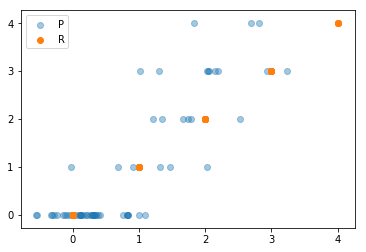

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)
prediction = lin_reg.predict(test_features)

plt.scatter(prediction,test_labels.values,alpha=0.4)
plt.scatter(test_labels.values,test_labels.values)
plt.legend('PR')
for i in range(len(train_features.columns)):
    print(train_features.columns[i],'=',lin_reg.coef_[i])

Check the RMSE between the predicted values and the actual labels using the linear model

In [23]:
from sklearn.metrics import mean_squared_error
ms_error = mean_squared_error(test_labels,prediction)
rmse = np.sqrt(ms_error)
print('RMSE from the OLS:',rmse)

RMSE from the OLS: 0.714499027327


Now test a Decision Tree Regressor model and compare the results

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_features, train_labels)
predictions_tree = tree_reg.predict(test_features)
ms_error_tree = mean_squared_error(test_labels,predictions_tree)
rmse_tree = np.sqrt(ms_error_tree)
print('RMSE from the Decision Tree Regressor model: ',rmse_tree)

RMSE from the Decision Tree Regressor model:  1.31656117721


From the RMSE the OLS seems to perform better than the decision tree regressor, however, a cross-validation is necessary to properly evaluate whether the model is behaving properly or not

# Performing Cross-Validation to test the accuracy of the chosen models

The code below performs a K-fold cross-validation given a trained model, the training set features and labels. The algorithms performs the cross-validation based on a utility function instead of cost function, so the negative of the obtained scores must be used. Each result corresponds to the rmse for each of the folds in the cross-validation algorithm

In [34]:
def disp_cross_scores(scores):
    print('Scores:',scores)
    print('Mean:',np.mean(scores))
    print('SD:',np.std(scores))
from sklearn.model_selection import cross_val_score
scores_lin = cross_val_score(lin_reg, train_features, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
scores_tree = cross_val_score(tree_reg, train_features, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
print('Scores obtained using a Random Tree Regressor:')
tree_rmse_scores = np.sqrt(-scores_tree)
disp_cross_scores(tree_rmse_scores)

print('\nScores obtained using a Linear Regression:')
lin_rmse_scores = np.sqrt(-scores_lin)
disp_cross_scores(lin_rmse_scores)

Scores obtained using a Random Tree Regressor:
Scores: [ 1.          1.60727513  1.41421356  1.20761473  1.30703226  1.02062073
  1.75697368  0.83405766  1.4295028   1.5742493 ]
Mean: 1.31515398504
SD: 0.282792229217

Scores obtained using a Linear Regression:
Scores: [ 0.6826044   0.92842991  0.98445625  0.86034746  0.74705868  0.87227463
  1.29934812  0.57271542  0.92920228  0.971432  ]
Mean: 0.884786913852
SD: 0.187395056497


From the K-fold cross-validation we could observe that in fact the random tree regressor performed worse than the linear regression. However, the mean value obtained from the linear regression cross-validation scores is larger than the individual RMSE value obtained using only one test and training

## Fine tuning the model
To fine tune the model a **grid search** approach which is found in Scikit can be used in order to explore multiple hyperparameters at once, allowing to find the optimal values of interest

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_leaf_nodes': [2 ,3, 10, 30],'max_features': [2, 4, 6, 8, 10, 12]}
  ]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_features,train_labels)

# Print the resulting RMSE scores and the chosen hyperparameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

1.09339840117 {'max_leaf_nodes': 2, 'max_features': 2}
1.05764217042 {'max_leaf_nodes': 3, 'max_features': 2}
1.04601712797 {'max_leaf_nodes': 10, 'max_features': 2}
1.20646235949 {'max_leaf_nodes': 30, 'max_features': 2}
1.10378835605 {'max_leaf_nodes': 2, 'max_features': 4}
1.07457289 {'max_leaf_nodes': 3, 'max_features': 4}
1.07638072269 {'max_leaf_nodes': 10, 'max_features': 4}
1.14619464279 {'max_leaf_nodes': 30, 'max_features': 4}
1.12866703367 {'max_leaf_nodes': 2, 'max_features': 6}
1.07522138851 {'max_leaf_nodes': 3, 'max_features': 6}
1.04924955222 {'max_leaf_nodes': 10, 'max_features': 6}
1.29414401198 {'max_leaf_nodes': 30, 'max_features': 6}
1.08741356301 {'max_leaf_nodes': 2, 'max_features': 8}
1.03435482478 {'max_leaf_nodes': 3, 'max_features': 8}
1.09177705388 {'max_leaf_nodes': 10, 'max_features': 8}
1.30232653242 {'max_leaf_nodes': 30, 'max_features': 8}
1.08711110191 {'max_leaf_nodes': 2, 'max_features': 10}
1.05609382342 {'max_leaf_nodes': 3, 'max_features': 10}
1.0

Apply the results obtained using the Grid Search to the model in and attempt it in the test set

In [97]:
tuned_decision_tree = DecisionTreeRegressor(max_features=grid_search.best_params_['max_features'],max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'])
tuned_decision_tree.fit(train_features,train_labels)
prediction_tuned = tuned_decision_tree.predict(test_features)

rmse_test = np.sqrt(mean_squared_error(prediction_tuned, test_labels))
print('RMSE from the prediction of the test data with the fine tuned model:\n',rmse_test)


RMSE from the prediction of the test data with the fine tuned model:
 1.08688258916


{'max_features': 8, 'max_leaf_nodes': 3}